<a href="https://colab.research.google.com/github/laewonJeong/Baekjoon/blob/main/DAP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**개요**
- 포켓몬 데이터셋을 사용
- 각 포켓몬의 능력치들을 학습해 전설의 포켓몬 분류기를 만듦
- 일반 포켓몬과 전설의 포켓몬은 어떤 차이가 있는지 시각화를 통해 알아봄


# **Import Libraires**
사용할 라이브러리들 먼저 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Pokemon Data**
- Data from all Pokemons and their different forms from all 8 generations.
- There are 44 columns and 1033 rows
- 각 포켓몬의 도감번호, 이름, 타입, 공격력, 방어력, 스피드 등 다양한 능력치와 정보가 담겨있음
- 출저) https://www.kaggle.com/maca11/all-pokemon-dataset


In [ ]:
df = pd.read_csv('All_Pokemon.csv')
df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [ ]:
df.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1.032000e+03,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,4.432171,1.061362e+06,0.564922,93.879845,0.121124,0.048450,0.017442,0.019380,0.867490,1.147045,1.061289,1.045785,1.005814,1.210514,1.074612,0.956395,1.128391,1.171996,0.975533,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,2.263713,1.570876e+05,0.496008,76.316071,0.326430,0.214818,0.130974,0.137923,0.288087,0.703754,0.607551,0.635515,0.748643,0.759727,0.758243,0.544938,0.762139,0.593650,0.500431,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,1.000000,6.000000e+05,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,3.000000,1.000000e+06,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,5.000000,1.000000e+06,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,6.000000,1.250000e+06,1.000000,127.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,8.000000,1.640000e+06,1.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


###**Handling Missing Value**
Type 2열의 Null값이 있는 것을 확인

In [ ]:
df.isnull().sum()

Number                       0
Name                         0
Type 1                       0
Type 2                     484
Abilities                    0
HP                           0
Att                          0
Def                          0
Spa                          0
Spd                          0
Spe                          0
BST                          0
Mean                         0
Standard Deviation           0
Generation                   0
Experience type              0
Experience to level 100      0
Final Evolution              0
Catch Rate                   0
Legendary                    0
Mega Evolution               0
Alolan Form                  0
Galarian Form                0
Against Normal               0
Against Fire                 0
Against Water                0
Against Electric             0
Against Grass                0
Against Ice                  0
Against Fighting             0
Against Poison               0
Against Ground               0
Against 

### **Type 2열은 사용하지 않을 것이기 때문에 삭제(drop)**

In [ ]:
df = df.drop(['Type 2'], axis = 'columns')
df.isnull().sum()

Number                     0
Name                       0
Type 1                     0
Abilities                  0
HP                         0
Att                        0
Def                        0
Spa                        0
Spd                        0
Spe                        0
BST                        0
Mean                       0
Standard Deviation         0
Generation                 0
Experience type            0
Experience to level 100    0
Final Evolution            0
Catch Rate                 0
Legendary                  0
Mega Evolution             0
Alolan Form                0
Galarian Form              0
Against Normal             0
Against Fire               0
Against Water              0
Against Electric           0
Against Grass              0
Against Ice                0
Against Fighting           0
Against Poison             0
Against Ground             0
Against Flying             0
Against Psychic            0
Against Bug                0
Against Rock  

### **능력치 제외하고 쓸데 없는 columns 삭제**

In [ ]:
df= df.drop(['Experience to level 100', 'Abilities','Standard Deviation',      
             'Final Evolution', 'Mega Evolution',
             'Alolan Form', 'Galarian Form', 'Against Normal', 'Against Fire',
             'Against Water', 'Against Electric', 'Against Grass', 'Against Ice',
             'Against Fighting', 'Against Poison', 'Against Ground',
             'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock',
             'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel',
             'Against Fairy','BMI'],axis='columns')# 쓸데 없는 columns 삭제


In [ ]:
df.head()

,Number,Name,Type 1,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Generation,Experience type,Catch Rate,Legendary,Height,Weight
0,1,Bulbasaur,Grass,45,49,49,65,65,45,318,53.000000,1.0,Medium Slow,45,0.0,0.7,6.9
1,2,Ivysaur,Grass,60,62,63,80,80,60,405,67.500000,1.0,Medium Slow,45,0.0,1.0,13.0
2,3,Venusaur,Grass,80,82,83,100,100,80,525,87.500000,1.0,Medium Slow,45,0.0,2.0,100.0
3,3,Mega Venusaur,Grass,80,100,123,122,120,80,625,104.166667,6.0,Medium Slow,45,0.0,2.4,155.5
4,4,Charmander,Fire,39,52,43,60,50,65,309,51.500000,1.0,Medium Slow,45,0.0,0.6,8.5


# **Visulization**

##**Check Type**
- 파이차트를 이용해 어떤 타입의 포켓몬이 많은 지 확인
- 물 타입이 가장 많고, 비행 타입이 가장 적음

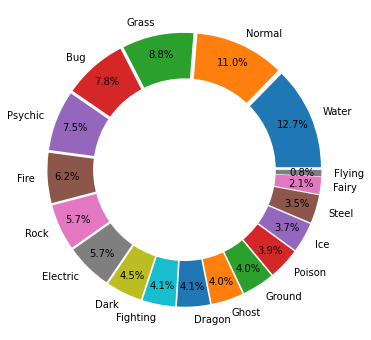

In [ ]:
df_type = df['Type 1'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

ax.pie(df_type.values, labels = df_type.index, autopct='%1.1f%%', pctdistance=0.85, explode = explode )

#draw white circle in the middle
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

###**전설의 포켓몬은 어떤 타입이 많은 지 확인**
- Seaborn의 countplot 이용
- 에스퍼 타입의 포켓몬이 가장 많고, 그 다음으로는 드래곤 타입이 많음
- 고스트 타입과 비행타입의 포켓몬이 가장 적음

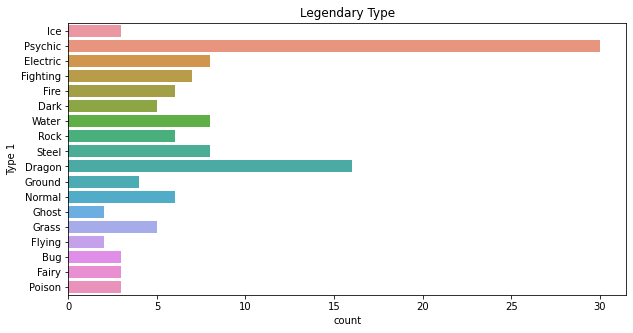

In [ ]:
LType = df[df['Legendary']==1.0]['Type 1']
LType = pd.DataFrame(LType)

plt.figure(figsize = (10,5))
sns.countplot(y = 'Type 1',data=LType)
plt.title("Legendary Type")
plt.show()

###**타입별로 능력치의 평균의 분포를 시각화**
- Seaborn의 boxplot 이용
- 드래곤 타입의 능력치 평균이 제일 높게 분포되어 있음
- 풀 타입의 능력치 평균이 제일 낮게분포 되어 있음

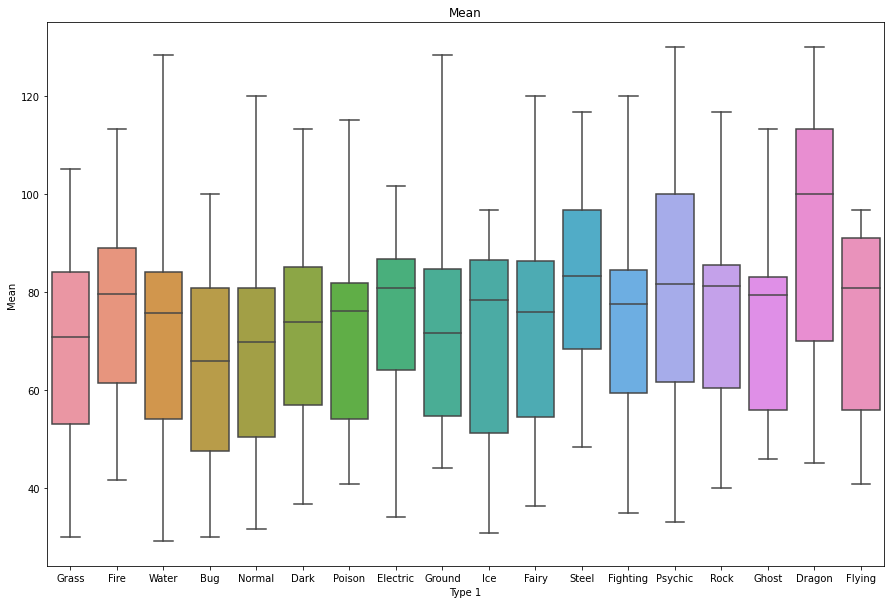

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'Type 1', y = 'Mean')
plt.title("Mean")
plt.show()

##**전체 포켓몬의 능력치 평균 분포**
- hist 이용

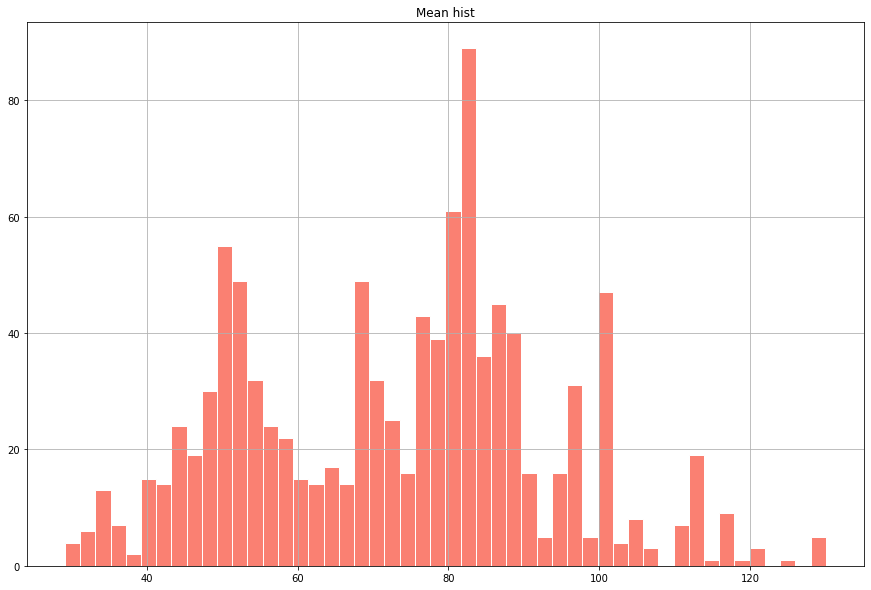

count    1032.000000
mean       73.108043
std        20.112591
min        29.166667
25%        55.000000
50%        76.500000
75%        85.833333
max       130.000000
Name: Mean, dtype: float64
Series([], Name: Name, dtype: object)


In [ ]:
fig = plt.figure(figsize = (15,10))
df['Mean'].hist(bins=50,histtype='bar', color = 'salmon', edgecolor='white')
plt.title('Mean hist')
plt.show()

##**Check Generation**
- 몇 세대 포켓몬이 제일 많은 지 확인
- 선 그래프 사용 (plt.plot())
- 5세대 포켓몬이 제일 많음
- 2세대 포켓몬이 제일 적음

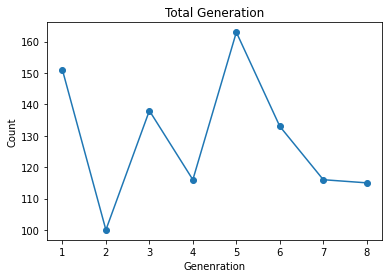

In [ ]:
# 몇세대 포켓몬이 제일 많은지 선그래프를 이용해 확인
df_generation = df['Generation'].value_counts().sort_index()
plt.plot(df_generation, marker ='o')
plt.xlabel("Genenration")
plt.ylabel("Count")
plt.title("Total Generation")
plt.show()

###**전설의 포켓몬은 몇 세대가 제일 많은 지 확인**
- 선 그래프 사용(plt.plot())
- 7세대에 전설의 포켓몬이 제일 많음
- 1세대에 전설의 포켓몬이 제일 적음

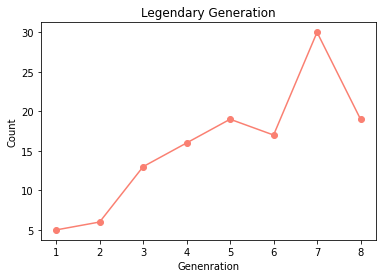

In [ ]:
# 전설의 포켓몬은 몇세대가 많은지 선그래프를 이용해 확인
df_legendary = df[df['Legendary']==1]
df_Lgeneration = df_legendary['Generation'].value_counts().sort_index()
plt.plot(df_Lgeneration, marker = 'o', color='salmon')
plt.xlabel("Genenration")
plt.ylabel("Count")
plt.title("Legendary Generation")
plt.show()

## **Legendary vs. Normal**

###**전설의 포켓몬과 일반 포켓몬의 수 비교**
- 막대 그래프 사용
- 일반 포켓몬은 907마리
- 전설의 포켓몬은 125마리

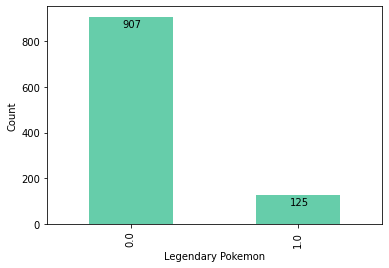

In [ ]:
df_legendary = df['Legendary'].value_counts()
df_legendary.plot.bar(xlabel="Legendary Pokemon", ylabel = "Count", color = '#66CDAA')
plt.text(0.95,80,df_legendary[1])
plt.text(-0.05,860,df_legendary[0])
plt.show()

###**전설의 포켓몬과 일반 포켓몬의 능력치 분포를 확인**
- Seaborn의 boxplot 이용
- 확실히 전설의 포켓몬의 능력치가 일반 포켓몬의 능력치에 비해 높이 분포되어 있음
- Catch Rate는 잡힐 확률
  - 전설의 포켓몬은 Catch Rate가 낮게 분포되어 있지만, 일반 포켓몬은 다양하게 분포하고 있음

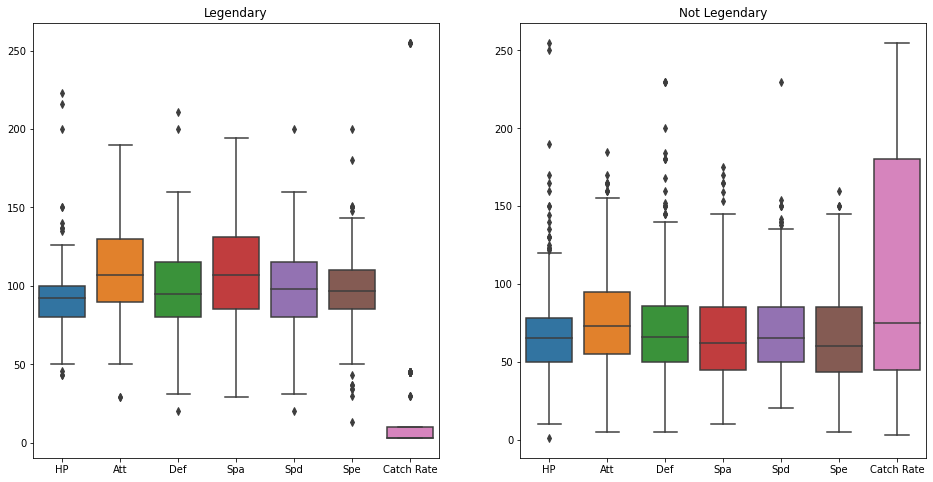

In [ ]:
# 능력치 분포 박스플롯으로 확인
fig = plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
data2 = df[df['Legendary']==1.0]
data2 = data2.drop(['Number','Name','Type 1','Mean','Generation','Experience type', 'Legendary', 'Height', 'Weight', 'BST'], axis = 'columns')
sns.boxplot(data = data2)

plt.title('Legendary')

plt.subplot(1,2,2)
data3 = df[df['Legendary']==0.0]
data3 = data3.drop(['Number','Name','Type 1','Mean','Generation','Experience type', 'Legendary', 'Height', 'Weight', 'BST'], axis = 'columns')
sns.boxplot(data = data3)

plt.title('Not Legendary')

plt.show()

더 보기 쉽게 선 그래프를 이용해서도 확인
- 전설의 포켓몬과 일반 포켓몬의 능력치가 차이가 많이 난다는 것을 알 수 있음

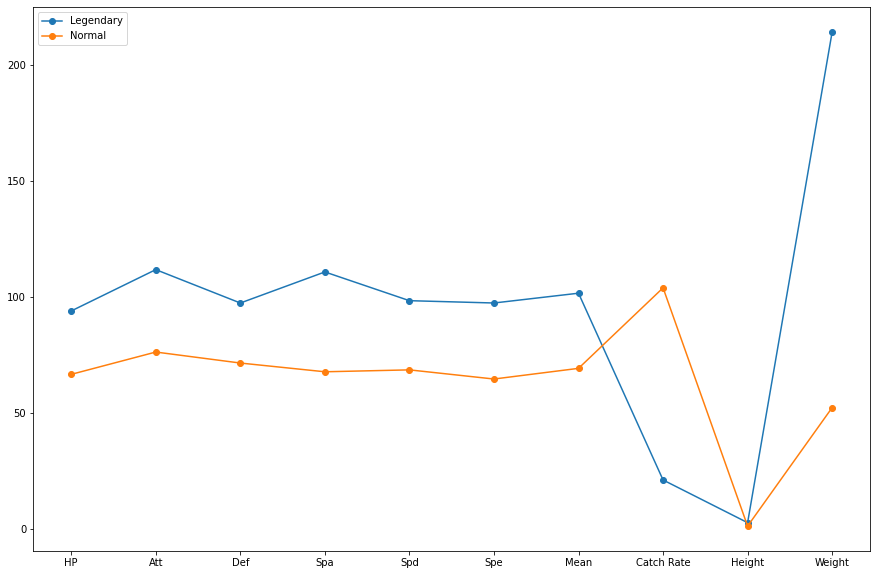

In [ ]:
df_legendary = pd.DataFrame(df[df['Legendary']==1.0])
df_normal = pd.DataFrame(df[df['Legendary']==0.0])

#전설의 포켓몬의 모든 값의 평균 구하기
a = df_legendary.describe()
a = pd.DataFrame(a)
a = a.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max'])# 평균값 빼고 다 제거
a= a.drop(['Number', 'Generation', 'Legendary','BST' ],axis='columns')# 쓸데 없는 columns 삭제
a = a.T

#그냥 노말 포켓몬의 모든 값의 평균 구하기
b = df_normal.describe()
b = pd.DataFrame(b)
b = b.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']) # 평균값 빼고 다 제거
b= b.drop(['Number', 'Generation', 'Legendary','BST'],axis='columns') # 쓸데 없는 columns 삭제
b = b.T

#선 그래프로 보이기
plt.figure(figsize = (15,10))
plt.plot(a,marker='o')
plt.plot(b,marker='o')
plt.legend(['Legendary','Normal'])

###**능력치 평균이 제일 높은 15마리의 포켓몬 확인**
- 확실히 전설의 포켓몬이 많이 있음
- 하지만, 중간 중간 전설의 포켓몬과 능력치가 비슷한 일반 포켓몬도 있음

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


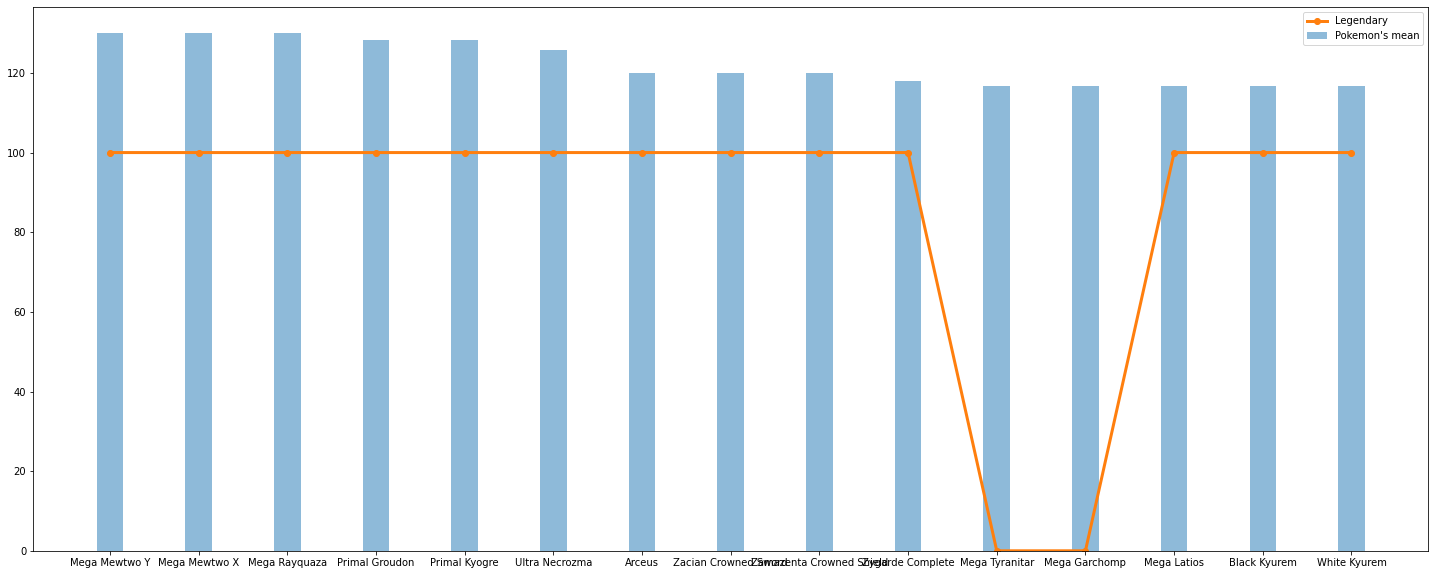

In [ ]:
df_Mean = df.sort_values(by=['Mean'],axis = 0,ascending=False) #전체 능력치의 평균이 높은 순으로 정렬
# 평균 값과 이름과 Legendary 빼고 다 제거
df_Mean = df_Mean.drop(['Number', 'Type 1', 'HP', 'Att', 'Def', 'Spa',
       'Spd', 'Spe', 'BST', 'Generation',
       'Experience type', 'Height', 'Weight'], axis ='columns')

df_Mean = df_Mean.reset_index(drop=True) #인덱스 넘버 값을 리셋

df_Mean = df_Mean.drop(labels = range(15,1032), axis = 0) # 0 ~ 14까지의 행만 남겨두고 삭제

for i in range(len(df_Mean['Legendary'])):
  df_Mean['Legendary'][i] = df_Mean['Legendary'][i]*100 #전설의 포켓몬인지 확인하기 위해 모든 Legendary 값의 100을 곱함

plt.figure(figsize=(25,10)) 
xtick_label_position = list(range(len(df_Mean['Name']))) 
plt.xticks(xtick_label_position, df_Mean['Name'])
 
# 바 차트 출력, 막대기 색깔을 파란색으로 설정, 선 그래프는 주황색으로 설정
plt.bar(xtick_label_position, df_Mean['Mean'], width=0.3,alpha = 0.5)
df_Mean['Legendary'].plot(color='#ff7f0e',linestyle = 'solid',linewidth = 3.0,marker='o')
plt.legend(['Legendary','Pokemon\'s mean'])
plt.show()

###**Experience Type Visualization**
- 전설의 포켓몬의 Experience Type을 알아봄
- Experience Type이란 쉽게 말해 경험치를 빠르게 얻는 타입인지, 느리게 얻는 타입인지
- 전설의 포켓몬의 Experience Type은 ***Slow***가 압도적으로 많고, 
- ***Medium Slow***가 조금 있음

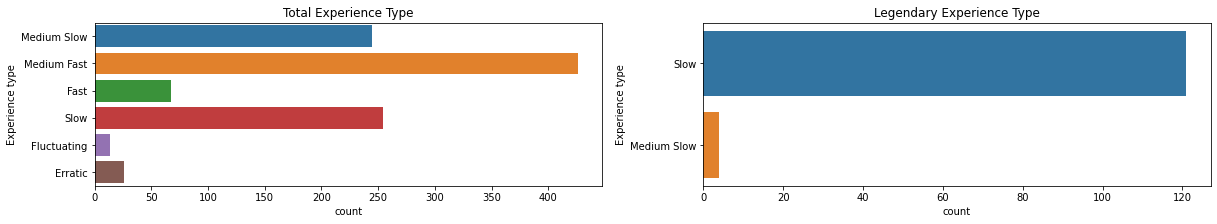

In [ ]:
plt.figure(figsize = (20,3))
plt.subplot(1,2,1)
Total_EType = df['Experience type']
Total_EType = pd.DataFrame(Total_EType)
sns.countplot(y = 'Experience type',data=Total_EType)
plt.title("Total Experience Type")

plt.subplot(1,2,2)
L_EType = df[df['Legendary']==1.0]['Experience type']
L_EType = pd.DataFrame(L_EType)
sns.countplot(y = 'Experience type',data=L_EType)
plt.title("Legendary Experience Type")

plt.show()

# **Classification**

##**Before Classification**

###**실수값 아닌 것들 One Hot coding**
- Pandas의 get_dummies 사용

In [ ]:
ML_df = df
ML_df = ML_df.drop('Name',axis = 'columns')
ML_df = pd.get_dummies(ML_df)

ML_df.head()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Generation,Catch Rate,Legendary,Height,Weight,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Experience type_Erratic,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
0,1,45,49,49,65,65,45,318,53.000000,1.0,45,0.0,0.7,6.9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,60,62,63,80,80,60,405,67.500000,1.0,45,0.0,1.0,13.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,80,82,83,100,100,80,525,87.500000,1.0,45,0.0,2.0,100.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,80,100,123,122,120,80,625,104.166667,6.0,45,0.0,2.4,155.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,39,52,43,60,50,65,309,51.500000,1.0,45,0.0,0.6,8.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


###**Robust Scaling 진행**
- Sckikit-learn의 RobustScaler 사용

In [ ]:
from sklearn.preprocessing import RobustScaler

# feature standardization
scaler = RobustScaler()
scale_columns = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe','BST','Mean','Catch Rate','Height','Weight']
ML_df[scale_columns] = scaler.fit_transform(ML_df[scale_columns])

ML_df = ML_df.set_index("Number")
X = ML_df.drop(["Legendary"],axis = 1)
y = ML_df["Legendary"]

ML_df.head()

,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Generation,Catch Rate,Legendary,Height,Weight,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Experience type_Erratic,Experience type_Fast,Experience type_Fluctuating,Experience type_Medium Fast,Experience type_Medium Slow,Experience type_Slow
Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.666667,-0.644444,-0.525,0.000000,-0.125,-0.444444,-0.762162,-0.762162,1.0,-0.182927,0.0,-0.3,-0.366921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.212121,-0.355556,-0.175,0.333333,0.250,-0.111111,-0.291892,-0.291892,1.0,-0.182927,0.0,0.0,-0.268968,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.393939,0.088889,0.325,0.777778,0.750,0.333333,0.356757,0.356757,1.0,-0.182927,0.0,1.0,1.128061,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.393939,0.488889,1.325,1.266667,1.250,0.333333,0.897297,0.897297,6.0,-0.182927,0.0,1.4,2.019269,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.848485,-0.577778,-0.675,-0.111111,-0.500,0.000000,-0.810811,-0.810811,1.0,-0.182927,0.0,-0.4,-0.341228,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


###**Train Test Split 진행**
- test_szie = 0.2
- random_state = 42

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

### **Import**
- 정확도와 precison, recall, f1 score를 확인하기 위해 import 진행

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## **Logistic Regression**
- Scikit-learn의 LogisticRegression을 사용
- 약 96%정도의 정확도가 나옴
- 하지만 Precision과 Recall 그리고 F1-Score는 80%대 임

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression(random_state = 42)

LogisticReg.fit(X_train, y_train)

predictions = LogisticReg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

#예측 실패한 포켓몬 확인
p = y_test
p=pd.DataFrame(p)
p1 = list(p['Legendary'])
num = p.index

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      print(df[df['Number']==num[i]].Name)

Accuracy: 0.961352657004831
Precision: 0.875
Recall: 0.8076923076923077
F1-Score: 0.8400000000000001 

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       181
         1.0       0.88      0.81      0.84        26

    accuracy                           0.96       207
   macro avg       0.92      0.90      0.91       207
weighted avg       0.96      0.96      0.96       207

1.0 0.0
458         Rayquaza
459    Mega Rayquaza
Name: Name, dtype: object
1.0 0.0
919    Pheromosa
Name: Name, dtype: object
1.0 0.0
583        Shaymin
584    Shaymin-Sky
Name: Name, dtype: object
1.0 0.0
1021    Kubfu
Name: Name, dtype: object
1.0 0.0
831             Zygarde
832         Zygarde 10%
833    Zygarde Complete
Name: Name, dtype: object
0.0 1.0
346    Slaking
Name: Name, dtype: object
0.0 1.0
298         Tyranitar
299    Mega Tyranitar
Name: Name, dtype: object
0.0 1.0
985    Hatterene
Name: Name, dtype: object


## **Naive Bayes**
- Scikit-learn의 GaussianNB를 사용
- 성능이 안 좋게 나옴...

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.8164251207729468
Precision: 0.4032258064516129
Recall: 0.9615384615384616
F1-Score: 0.5681818181818181 

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.88       181
         1.0       0.40      0.96      0.57        26

    accuracy                           0.82       207
   macro avg       0.70      0.88      0.73       207
weighted avg       0.92      0.82      0.84       207



## **Decision Tree**
- Scikit-learn의 DecisionTreeClassifier를 사용
- 성능은 현재까지 제일 좋게 나왔고, 정확도는 98.5%
- Feature Importance를 시각화하여 확인했을 때 Catch Rate가 제일 중요했음
  - 그 다음으로는 Height, Spe, Weight ...

Accuracy: 0.9855072463768116
Precision: 0.96
Recall: 0.9230769230769231
F1-Score: 0.9411764705882353 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       181
         1.0       0.96      0.92      0.94        26

    accuracy                           0.99       207
   macro avg       0.97      0.96      0.97       207
weighted avg       0.99      0.99      0.99       207

1.0 0.0
923    Guzzlord
Name: Name, dtype: object
1.0 0.0
829    Xerneas
Name: Name, dtype: object
0.0 1.0
705    Litwick
Name: Name, dtype: object


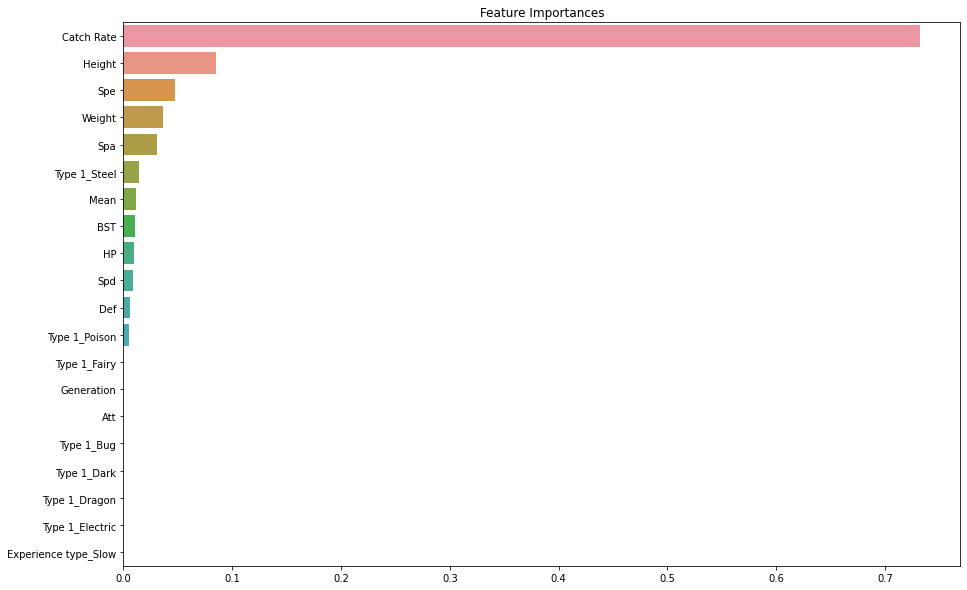

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

#예측 실패한 포켓몬 확인
p = y_test
p=pd.DataFrame(p)
p1 = list(p['Legendary'])
num = p.index

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      print(df[df['Number']==num[i]].Name)

feature_importance_values = clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

## **Random Forest**
- Scikit-learn의 RandomForestClassifier를 사용
- Decision Tree보다 더 좋은 성능을 보였음, 정확도는 99%
- Feature Importance를 시각화하여 확인했을 때, Decision Tree와 마찬가지로 ***Catch Rate***가 제일 중요했음
  - 그 다음으로는 능력치 평균, 능력치 총합, Experience type_Slow, Height, Weight...
  - 결국 포켓몬의 능력치가 전설의 포켓몬을 결정할 때 중요함

Accuracy: 0.9903381642512077
Precision: 1.0
Recall: 0.9230769230769231
F1-Score: 0.9600000000000001 

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       181
         1.0       1.00      0.92      0.96        26

    accuracy                           0.99       207
   macro avg       0.99      0.96      0.98       207
weighted avg       0.99      0.99      0.99       207

1.0 0.0
1021    Kubfu
Name: Name, dtype: object
1.0 0.0
831             Zygarde
832         Zygarde 10%
833    Zygarde Complete
Name: Name, dtype: object


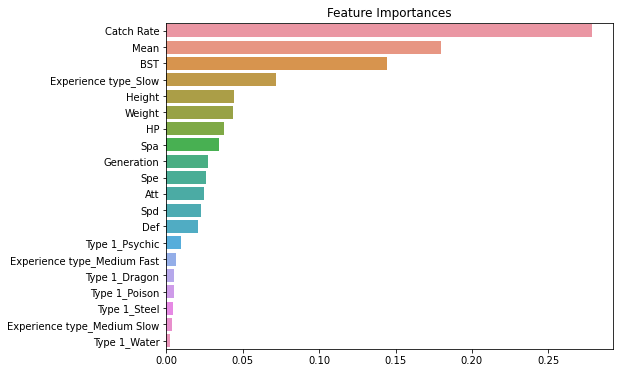

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

#예측 실패한 포켓몬 확인
p = y_test
p=pd.DataFrame(p)
p1 = list(p['Legendary'])
num = p.index

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      if num[i] in df['Number']:
        print(df[df['Number']==num[i]].Name)

feature_importance_values = clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

## **Train the Support Vector Classifier**
- Scikit-learn의 SVC를 이용
- 정확도는 95%이지만, Recall과 F1-Score의 값은 낮음

In [ ]:
from sklearn.svm import SVC

model = SVC(gamma='auto')

model.fit(X_train,y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.9565217391304348
Precision: 0.9047619047619048
Recall: 0.7307692307692307
F1-Score: 0.8085106382978723 

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       181
         1.0       0.90      0.73      0.81        26

    accuracy                           0.96       207
   macro avg       0.93      0.86      0.89       207
weighted avg       0.96      0.96      0.95       207



## **Gridsearch**
- Scikit-learn의 GridSearchCV를 이용

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.885 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.885 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

###**grid.best_params_**
- C: 1000, gamma: 0.01, kernel: rbf일 때가 가장 최적

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

###**결과**
- 성능이 SVC를 이용했을 때 보다 많이 좋아짐

In [ ]:
predictions = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

p = y_test
p=pd.DataFrame(p)
p1 = list(p['Legendary'])
num = p.index

for i in range(len(y_test)):
    if p1[i] != predictions[i]:
      print(p1[i], predictions[i])
      if num[i] in df['Number']:
        print(df[df['Number']==num[i]].Name)

Accuracy: 0.9806763285024155
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1-Score: 0.9230769230769231 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       181
         1.0       0.92      0.92      0.92        26

    accuracy                           0.98       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.98      0.98      0.98       207

1.0 0.0
933    Blacephalon
Name: Name, dtype: object
0.0 1.0
535    Drapion
Name: Name, dtype: object
1.0 0.0
831             Zygarde
832         Zygarde 10%
833    Zygarde Complete
Name: Name, dtype: object
0.0 1.0
298         Tyranitar
299    Mega Tyranitar
Name: Name, dtype: object


#**결론**
- 현실세계에 전설의 포켓몬을 나누는 기준은 따로 없지만, 포켓몬들의 능력치만 가지고도 기계학습을 통해 어느정도 분류를 할 수 있었음
- ***Random Forest***의 성능이 가장 좋았음
- 분류를 할 때 포켓몬의 ***능력치***를 많이 봄
  - 따라서, 능력치가 높은 일반 포켓몬을 전설의 포켓몬으로 분류하고,
  - 능력치가 낮은 전설의 포켓몬은 일반으로 분류를 할 때가 있었음
- 포켓몬의 데이터가 그렇게 많은 건 아니지만, 새로운 포켓몬들이 계속 생기다 보면 Feature Importance도 바뀔 수 있고, 그로인해 성능이 더 좋은 분류기를 만들 수 있을 것 같음

#**향후계획**
- 데이터 샘플링도 진행하여 더 좋은 성능을 갖는 분류기를 만들어 보고 싶음
- Naive Bayse의 성능이 안 좋게 나왔는데 성능을 향상시켜 볼 예정
- 포켓몬 이미지 데이터를 가지고도 분류가 가능할지 궁금해졌음
  - 따라서, 포켓몬 이미지셋 데이터를 가지고 학습을 돌려보고싶음

#**참고자료**
- https://seaborn.pydata.org/index.html (Visualization)
- https://scikit-learn.org/stable/index.html (Classification)
- https://injo.tistory.com/30 (Random Forest/Feature Importances)
- 데이터 분석 프로그래밍 강의/실습 자료